# Fortpflanzung von Messunsicherheiten

In der Messtechnik gibt es zwei Möglichkeiten eines Messprinzips:
* Das **direkte Messverfahren**: der gesuchte Messwert wird unmittelbar durch den Vergleich mit einem Bezugswert derselben Messgröße gewonnen. Als Beispiel eignet sich hier die Balkenwaage, die die unbekannte Masse $m$ mit der bekannten Masse eines Gewichtssteins vergleicht.
* Das **indirekt Messerverfahren**: Die meisten physikalischen Größen werden so ermittelt, da sie nur indirekt ermittelt werden können. Die gesuchte Messgröße wird hierbei über physikalische Zusammenhänge auf andere Größen zurückgeführt und anschließend aus diesen ermittelt. Die Federwaage ist ein Beispiel hierfür, bei der eine unbekannte Masse $m$ über die Auslenkung $x$ einer Feder (Federkonstante $k$) ermittelt werden soll. Gravitationskraft wird der Rückstellkraft der Feder gleichgesetzt und man erhält folgenden Zusammenhang, wobei $g$ die Schwerebeschleunigung ist. 

![Bild](pictures/direkt_indirekt.png)

Durch dieses Beispiel wird klar, dass Messgrößen $y$ oft nicht direkt ermittelt werden, sondern über funktionelle Zusammenhänge von $n$ Messgrößen $x_i$ bestimmt werden:

$$ y = f(x_1, x_2, ...,x_n)$$

**Achtung**, bei $x_i$ handelt es sich nicht um Stichprobengrößen $x_j$, sondern um  Messungen *unterschiedlicher* physikalischer Messgrößen, beispielsweise Federkonstante $k$ und Auslenkung $x$).

Wie wirken sich Messunsicherheiten der Messgrößen $x_i$ auf das Ergebnis $y$ aus? Im folgenden Plot ist ersichtlich, dass eine Abweichung der Größe $x$ zwangsläufig eine Abweichung der Größe $y$ zur Folge hat:

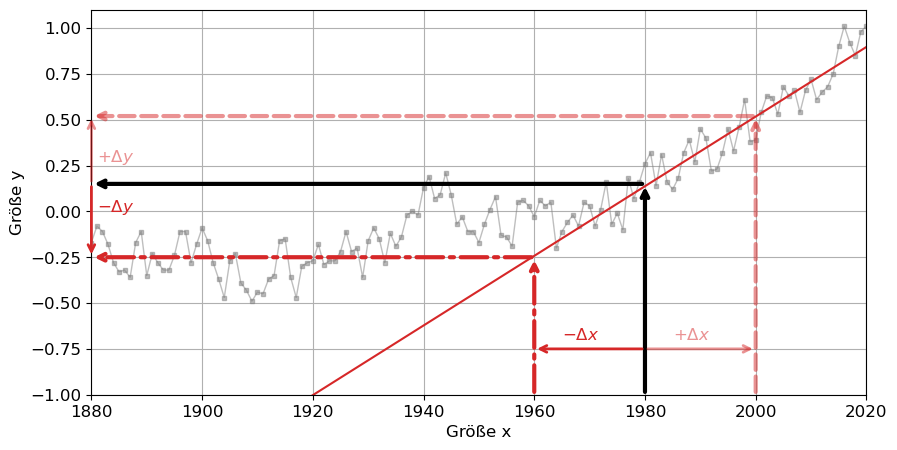

In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 12; # Schriftgröße

link = 'data/graph.csv' # Beispieldatei mit Klimadaten
global_mean = pd.read_csv(link, header = 1) # Daten einlesen
global_mean["uncertainty"] = 0.25 #Messunsicherheiten abschätzen, hier 0.25K Temperaturgenauigkeit angenommen

x=global_mean.loc[global_mean["Year"] >= 1980,"Year"]
y=global_mean.loc[global_mean["Year"] >= 1980,"No_Smoothing"]
y_err = global_mean.loc[global_mean["Year"] >= 1980,"uncertainty"]
model = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0][0]*global_mean["Year"]+model[0][1] # Modell einer linearen Regression

plt.plot(global_mean["Year"],global_mean["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],y_model, ls="-", lw=1.5, color="tab:red", label=f"lineare Regression y=({model[0][0]*1000:.3f}+-{np.sqrt(model[1][0][0]*1000):.3f})1e-3*x+({model[0][1]:.3f}+-{np.sqrt(model[1][1][1]):.3f})");
plt.xlabel('Größe x')
plt.ylabel("Größe y")

plt.annotate("",xy=(1980, 0.15), xycoords='data',xytext=(1980, -1), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "k", lw=3), )
plt.annotate("",xy=(1880, 0.15), xycoords='data',xytext=(1980, 0.15), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "k", lw=3), )

plt.annotate("",xy=(1960, -0.25), xycoords='data',xytext=(1960, -1), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:red", lw=3, ls = '-.'), )
plt.annotate("",xy=(1880, -0.25), xycoords='data',xytext=(1960, -0.25), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:red", lw=3, ls = '-.'), )

plt.annotate("",xy=(2000, 0.52), xycoords='data',xytext=(2000, -1), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:red", lw=3, alpha = 0.5, ls = '--'), )
plt.annotate("",xy=(1880, 0.52), xycoords='data',xytext=(2000, 0.52), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:red", lw=3, alpha = 0.5, ls = '--'), )

# X-Arrows:
plt.annotate("",xy=(1960, -0.75), xycoords='data',xytext=(1980, -0.75), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:red", lw=2), )
plt.annotate('',xy=(2000, -0.75), xycoords='data',xytext=(1980, -0.75), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:red", lw=2, alpha = 0.5), )
plt.annotate(r'$-\Delta x$',xy=(1960, -0.75),xytext=(1965, -0.7), color="tab:red")
plt.annotate(r'$+\Delta x$',xy=(2000, -0.75),xytext=(1985, -0.7), color="tab:red", alpha = 0.5)

# Y-Arrows:
plt.annotate("",xy=(1880, -0.25), xycoords='data',xytext=(1880, 0.15), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:red", lw=2), )
plt.annotate('',xy=(1880, 0.52), xycoords='data',xytext=(1880, 0.15), textcoords='data',arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = "tab:red", lw=2, alpha = 0.5), )
plt.annotate(r'$-\Delta y$',xy=(1881, -0.),xytext=(1881, -0.), color="tab:red")
plt.annotate(r'$+\Delta y$',xy=(1881, 0.27),xytext=(1881, 0.27), color="tab:red", alpha = 0.5)

plt.xlim([1880,2020])
plt.ylim([-1.0,1.1])
plt.grid();

Das Intervall $\pm \Delta x = 20$ im obigen Plot um 1980 drum herum wird durch *irgendeinen* funktionellen Zusammenhang $f(x)$ auf das Intervall $\Delta y$ abgebildet. Durch den Messwert $x_0 = 1980$ kann eine lineare Ausgleichsgerade gezogen werden, deren Steigung der Ableitung der Funktion in diesem Punkt entspricht, $df(x_0)/dx$. Anhand der Steigung der linearen Ausgleichsgeraden kann man den Fehler für $y$ direkt ablesen: $\Delta y \approx 0,375$. Man sieht jedoch in der Abbildung auch, dass diese Abschätzung umso schlechter wird, je größer $\Delta x$ ist. Je nach Funktionstyp müssen also auch höhere Ableitungen berücksichtigt werden (*Taylorentwicklung* von $f(x)$).

## Herleitung: Taylorentwicklung

Für eine allgemeine Funktion $f(x) = y(x)$ **einer** Zufallsgröße $x$ lässt sich die Frage
nach der Unsicherheit näherungsweise beantworten, wenn man
die Taylor-Entwicklung von $y$ an der Stelle $\bar x$ um deren Messabweichung $\Delta x$ herum entwickelt:

$$y = y(x)\quad \Rightarrow \quad y(x+\Delta x)= y(x) + \frac1{1!}\ \frac{dy(x)}{dx} \cdot \Delta x + \frac1{2!}\ \frac{d^2 y(x)}{d x^2}\cdot (\Delta x)^2 + \cdots$$

Da die Unsicherheit typischerweise eine kleine Größe ist, wird die Reihenentwicklung nach dem linearen Glied abgebrochen, da höhere Ordnung von $(\Delta x)^2$ recht klein werden. Damit ergibt sich die Näherung:

$$ y(x+\Delta x)= y(x) + \frac1{1!}\ \frac{dy(x)}{dx} \cdot \Delta x \quad \Rightarrow \quad y(x+\Delta x) - y(x) = \Delta y =  \frac{dy(x)}{dx} \cdot \Delta x$$

Diese Formel gilt, wenn das Messergebnis von einer einzelnen Zufallsgröße abhängt. Kommen weitere Messgrößen dazu, welche voneinander unabhängig sind, wird die entsprechende Reihenentwicklung verwendet, welche ebenfalls bis zum linearen Glied als Näherung für kleine $\Delta x$ angenommen werden kann:

$$y = y(x_1, x_2, ...)  \quad \Rightarrow \quad \Delta y = \frac{\partial y}{\partial x_1} \cdot \Delta x_1 + \frac{\partial y}{\partial x_2} \cdot \Delta x_2 + ...$$

wobei hier der Term $\frac{\partial y}{\partial x_1}$ die *partielle* Ableitung der Funktion $y(x_1, x_2, ...)$ nach der Größe $x_1$ bedeutet. Wird die partielle Ableitung nach $x_1$ berechnet, verhalten sich alle anderen Eingangsgrößen ($x_2, ...$) wie eine Konstante. 

## Vorzeichen bekannt (systematische Abweichungen)

Ist das Vorzeichen der Messabweichung bekannt, müssen die Vorzeichen unbedingt berücksichtigt werden. Das Ergebnis wird anschließend um diesen *Offset* korrigiert und nicht mit dem $\pm$-Symbol, wie für Mess*unsicherheiten* üblich versehen.

Die allgemeine Formel aus dem vorangegangenen Kapitel ist gültig und die Messabweichung für $y$ berechnet sich zu:
$$\Rightarrow \quad \Delta y = \frac{\partial y}{\partial x_1} \cdot \Delta x_1 + \frac{\partial y}{\partial x_2} \cdot \Delta x_2 + ...$$

Wichtige Spezialfälle sind Summen, Differenzen, Produkte oder Quotienten von zwei Größen. Beachte hier, dass wir in diesem Kapitel Fehler **mit Vorzeichen** betrachten, das heißt wir wissen, in welche Richtung der Messwert abweicht. 

* Setzt sich die gesuchte Größe $y$ aus der **Addition** zweier unabhängigen Messwerte zusammen, so wird ihre Abweichung aus der Addition der Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 + x_2 \Rightarrow  \color{blue}{
   \Delta y =  \Delta x_1 + \Delta x_2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Subtraktion** zweier unabhängigen Messwerte zusammen, so wird ihre Abweichung aus der Subtraktion der Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 - x_2 \Rightarrow  \color{blue}{
   \Delta y =  \Delta x_1 - \Delta x_2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Multiplikation** zweier unabhängigen Messwerte zusammen, so wird ihre relative Abweichung aus der Addition der relativen Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 \cdot x_2 \Rightarrow  \color{blue}{
   \frac{\Delta y}{y} =  \frac{\Delta x_1}{x_1} + \frac{\Delta x_2}{x_2} }$$

* Setzt sich die gesuchte Größe $y$ aus der **Division** zweier unabhängigen Messwerte zusammen, so wird ihre relative Abweichung aus der Subtraktion der relativen Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 / x_2 \Rightarrow  \color{blue}{
   \frac{\Delta y}{y} =  \frac{\Delta x_1}{x_1} - \frac{\Delta x_2}{x_2} }$$
   
**Anmerkung:** Hierbei werden keine Fehlergrenzen (mit $\pm$) angegeben, sondern systematische Messabweichungen mit bekanntem Vorzeichen. Bei Fehlergrenzen und statischen Unsicherheiten, gelten andere Sacherverhalte (siehe nächsten Abschnitt)! Die Formeln gelten *nur*, wenn das Vorzeichen des Fehlers bekannt ist. Bei dieser Fehlerfortpflanzung können sich also Abweichungen ergänzen oder sogar *aufheben*, wie das folgende Beispiel zeigt.

**Beispiel:** Eine Messgröße $x_1$ wird um 2% zu klein gemessen und Messgröße $x_2$ um 3% zu groß. 
> Bei der Multiplikation $y=x_1 \cdot x_2$ wird $y$ um 5% zu groß gemessen (2% + 3% = 5%).

> Bei der Division $y=x_1 / x_2$ wird $y$ um 1% zu klein gemessen (2% - 3% = -1%).

## Vorzeichen *un*bekannt (systematische unabhängige Abweichungen) <a id="SubSec-Fehlergrenzen"></a> 

Die Größe der Messabweichung eines Messgereätes ist zwar betragsmäßig bekannt, das Vorzeichen jedoch nicht. Dies war auch der Fall in unserem obigen Beispiel der *Messgeräteabweichung*. Somit sind nur die Grenzen dieser Abweichung bekannt. Die gesuchte Abweichung $\Delta y$ der Messgröße $y$ kann aber über denselben mathematischen Ansatz wie eben ermittelt werden, wobei wir annehmen, dass sich die Abweichungen im schlimmsten Fall bei ungünstigen Vorzeichenkombinationen zu einem **Maximalfehler** addieren:

$$\Delta y = \left| \frac{\partial y}{\partial x_1} \right| \cdot \Delta x_1+ \left|\frac{\partial y}{\partial x_2} \right| \cdot \Delta x_2 + \cdots$$

Die Spezialfälle vereinfachen sich aufgrund der Beträge zu folgenden Sachverhalten:

* Setzt sich die gesuchte Größe $y$ aus der **Addition oder Subtraktion** zweier unabhängigen Messwerte zusammen, so wird ihre Abweichung aus der Addition der Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 \pm x_2 \Rightarrow  \color{blue}{
   \Delta y =  \Delta x_1 + \Delta x_2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Multiplikation oder Division** zweier unabhängigen Messwerte zusammen, so wird ihre relative Abweichung aus der Addition der relativen Abweichungen der Einzelmessungen berechnet: 

$$y=x_1 \cdot x_2 \quad \textrm{oder} \quad y=x_1 / x_2 \Rightarrow  \color{blue}{
   \frac{\Delta y}{y} =  \frac{\Delta x_1}{x_1} + \frac{\Delta x_2}{x_2} }$$   

## Zufällige, unabhängigen Variablen <a id="SubSec-Fehlerfortpflanzung_bei_unabhängigen_Unsicherheiten"></a> 

Nun gehen wir über von Fehlerfortpflanzungsgesetzen für systematische Abweichungen zu Gesetzmäßigkeiten, die für rein statistische Messgrößen $x$ gelten. Die Messgröße $x$ wird wie oben eingeführt über statstische Verfahren ermittelt und im Rahmen einer Messreihe (mit $m$ Messwerten) aufgenommen. Mittelwert und Unsicherheit werden also wiefolgt berechnet:

$$\overline x = \frac{1}{m}\sum_{j=1}^m x_j$$

$$s(\overline x) = \frac{s}{\sqrt{m}} = \sqrt{\frac{1}{m(m-1)} \sum_{j=1}^m (x_j - \overline x)^2} =  u_{\overline x}$$

Für große Stichproben wird die Unsicherheit des Mittelwertes immer kleiner und strebt gegen Null, und bei Abwesenheit systematischer Fehler nähert sich der Mittelwert somit dem *wahren* Wert an. 

Bei der Fehlerfortpflanzung wird als Eingangsgröße häufig der Mittelwert benutzt, und seine entsprechend kleine Unsicherheit benutzt, um die Unsicherheit für die Ausgangsgröße $y$ zu bestimmen. Die Taylorreihe von $y(x)$ wird entsprechend an der Stelle des Mittelwertes $x = \bar x$ entwickelt und es folgt:

$$u_y = \left| \frac{dy}{dx} \right| \cdot u_\bar x$$

Da es sich bei statistische Unsicherheiten um Grenzen handelt, also das Vorzeichen der Abweichung nicht existiert, müssen wieder deren Beträge berücksichtigt werden. 

Haben wir nun den Fall, dass sich die gesuchte Größe $y$ aus mehreren voneinander unabhängigen Eingangsgrößen $\bar x_1, \bar x_2, ...$ und deren Unsicherheiten $u_1, u_2, ...$ zusammensetzt, gelten folgenden Regeln:

* Das Messergebnis $y$ berechnet sich aus den Mittelwerten $\bar x_1, \bar x_2, ...$
* Um die Unsicherheit $u_y$ zu bestimmen, wird wieder mit der linearen Näherung bei mehreren unabhängigen Variablen begonnen (partielle Ableitungen bilden!), allerdings müssen jetzt, wie bei der Berechnung der Standardunsicherheit, die *quadrierten* Beiträge der Einzelunsicherheiten addiert werden:

$$u_y = \sqrt{\left (\frac{\partial y}{\partial x_1} \cdot u_1 \right)^2 +\left (\frac{\partial y}{\partial x_2} \cdot u_2 \right)^2 +\cdots}$$

Dies nennt sich auch das **Gauß'sche Fehlerfortpflanzungsgesetz** und wird bei Unsicherheiten, aber nicht bei systematischen Messabweichungen / Fehlern verwendet. 

Für die Spezialfälle gilt nun:

* Setzt sich die gesuchte Größe $y$ aus der **Addition oder Subtraktion** zweier unabhängigen Messwerte zusammen, so wird ihre quadrierte Unsicherheit aus der Addition der quadrierten Unsicherheiten der Einzelmessungen berechnet: 

$$y=\bar x_1 \pm \bar x_2 \Rightarrow  \color{blue}{
   u_y^2 =  u_1^2 + u_2^2 } $$
   
* Setzt sich die gesuchte Größe $y$ aus der **Multiplikation oder Division** zweier unabhängigen Messwerte zusammen, so wird ihre relative quadrierte Unsicherheit aus der Addition der relativen quadrierten Unsicherheiten der Einzelmessungen berechnet: 

$$y=\bar x_1 \cdot \bar x_2 \quad \textrm{oder} \quad y=\bar x_1 / \bar x_2 \Rightarrow  \color{blue}{
   \left(\frac{u_y}{y}\right)^2 =  \left(\frac{u_1}{\bar x_1}\right)^2 + \left(\frac{u_2}{\bar x_2} \right)^2}$$  
   
**Hinweis:** Diese Gesetze sind nur bei hinreichender Linearität anwendbar, d.h. wenn sich die Funktion $y(x_1, x_2, ...)$ bei Änderung einer der Eingsangsgrößen $x_i$ im Bereich ihrer eigenen Unsicherheit $u_i$ nur hinreichen linear verändert. Andernfalls wird die Fehlerfortpflanzung aufwendiger (DIN1319).

## Zufällige, abhängige (korrelierte) Variablen <a id="SubSec-Fehlerfortpflanzung_bei_korrelierten_Unsicherheiten"></a> 

### Korrelation und Kovarianz-Matrix <a id="sec_korrelation_kovarianz"></a> 

Häufig liegt in der Messtechnik der Fall vor, dass wir voneinander unabhängige Messungen betrachten und diese zu unserer gesuchten Messgröße kombinieren. Teilweise können aber auch Messungen beobachtet werden, welche eine Abhängigkeit voneinander aufweisen. In diesem Fall spricht man von **Korrelationen** zwischen Messgrößen und ein *Kovarianz-Term* muss berücksichtigt werden! 

* Bei **unabhängigen (nicht-korrelierten)** Messungen wird der Kovarianz-Term auf Null gesetzt: 

$$\mathrm{cov}(x_1, x_2) = 0$$

* Bei **abhängigen (korrelierten)** Messungen besitzen die Messungen *gemeinsame* Unsicherheiten, wenn z.B. alle Messungen eine gemeinsame systematische Unsicherheit besitzen: 

$$\mathrm{cov}(x_1, x_2) = \underbrace{\left< x_1 x_2 \right>}_{\substack{\text{zuerst Multiplikation,} \\ \text{dann Mittelwertbildung}}} - \underbrace{\left< x_1 \right>\left< x_2 \right>}_{\substack{\text{zuerst Mittelwertbildung,} \\ \text{dann Multiplikation}}}$$

Diese *gemeinsame* Unsicherheit resultiert darin, dass Abhängigkeiten zwischen den gemessenen Messwerten $x_1$ und $x_2$ entstehen. Ist zum Beispiel die eine Messgröße $x_1$ zu groß, so ist die Wahrscheinlichkeit, dass auch die andere Größe $x_2$ einen zu großen Wert hat, erhöht. Diesen Effekt, dass beide Größen zu große Werte ausgeben, nennt man auch **positive Korrelation**. Entsprechend würde eine **negative Korrelation** bedeuten, dass der zweite Wert einer Messgröße mit erhöhter Wahrscheinlichkeit zu klein ausgegeben wird, obwohl die erste Größe einen zu großen Wert hat. Ein Beispiel für eine negative Korrelation ist die Ausgleichsgerade $y = m\cdot x + b$, welche an Messwerte angepasst werden kann. Wenn sich der Wert von $m$ vergrößert, zu muss zwangsläufig der $y$-Achsenabschnitt $b$ kleiner werden, damit die Gleichung weiterhin erfüllt ist. Die Größen $m$ und $b$ sind also negativ korreliert. 
Sind hingegen zwei Variablen *unabhängig*, so kann man aus dem Wert der ersten *keine* Information über die zweite Variable gewinnen. In diesem Fall ist die Korrelation exakt Null. 

* Im Prinzip kann die Kovarianz, und somit auch die Werte in der Kovarianzmatrix, jeden beliebigen Wert annehmen, was zu einem sehr großen Wertebereich führt. Um die Darstellung zu vereinfachen wird die Kovarianz typischerweise normiert, sodass die Kovarianz Werte zwischen $-1$ und $+1$ annimmt und sich der **Korrelationskoeffizient** ergibt:

$$\bigl( r_{ij} \bigr) \,=\, \Bigl (\frac{ \mathrm{S}^2_{ij} } {s_i\,s_j} \Bigr)$$

* Der Korrelationskoeffizient für nur zwei Variablen sieht in vereinfachter Schreibweise wiefolgt aus:

$$r = \frac{\mathrm{cov}_{x_1x_2}}{s_{x_1} \cdot s_{x_2}} = \frac{\sum_{i=1}^N (x_{1,i}-\overline x_1)\cdot (x_{2,i}-\overline x_2)}{\sqrt{\sum_{i=1}^N (x_{1,i}-\overline x_1)^2} \cdot \sqrt{ \sum_{i=1}^N (x_{2,i}-\overline x_2)^2}}$$

> Wir haben nun verschiedene Kenngrößen der Statistik kennengelernt, um Beziehungen zwischen zwei Variablen zu beschreiben. Die **Kovarianz** ist eher ungeeignet um Größen miteinander zu vergleichen, da sie von der Skalierung abhängt. Der **Korrelationskoeffizient** hingegen ist eine mormierte Größe und kann als Maß für Korrelationen benutzt werden. Allerdings nur für lineare Korrelationen! Außerdem muss auch hierbei Vorsicht gewahrt werden: Eine hoher Korrelationskoeffizient bedeutet nicht immer eine hohe Korrelation der Variablen. Es kann sich auch um Ausreißer handeln! Außerdem wird die Bedeutung der Korrelation auch häufig überinterpretiert. Ein kleiner Korrelationskoeffizient beudetet nämlich auch nicht notwendigerweise, dass es keinerlei Beziehung zwischen zwei Variablen gibts. Der Zusammenhang könnte ja ein anderer als linear sein, z.B. quadratisch. Dann würde die Korrelation trotz quadratischem Zusammenhang den Wert 0 ausgeben. 

Zum besseren Verständnis mag ein Beispiel helfen. Wir erzeugen dazu Zufallsgrößen mit
unabhängigen und gemeinsamen Fehlern.

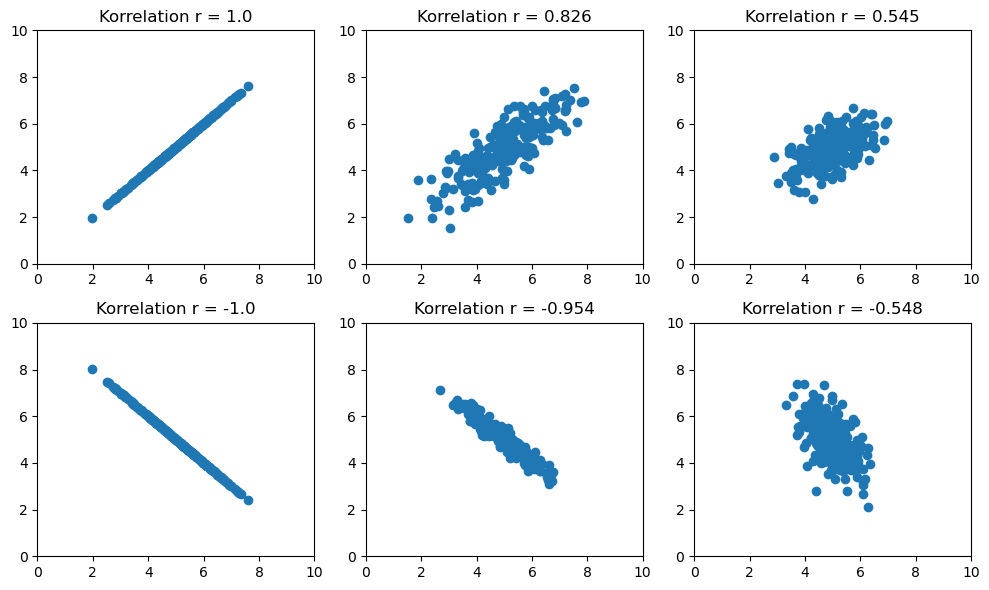

In [2]:
def scatterplot(x, y): 
    rho = np.corrcoef(m_1,m_2)[1,0]
    plt.scatter(x, y, color="tab:blue")
    plt.title('Korrelation r = ' + str(round(rho,3)))
    plt.xlim([0,10])
    plt.ylim([0,10])
    
plt.figure(figsize=(10,6)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

# Zufallszahlen erzeugen
u_1 = np.random.randn(250)
u_2 = np.random.randn(250)
u_g = np.random.randn(250)

# richtige Werte
r_1 = 5.0
r_2 = 5.0
    
# Plot 1:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.0, 0.0, 1.0
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 + s_g*u_g
plt.subplot(2,3,1)
scatterplot(m_1, m_2)

# Plot 2:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.5, 0.5, 1.0
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 + s_g*u_g
plt.subplot(2,3,2)
scatterplot(m_1, m_2)

# Plot 3:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.5, 0.5, 0.5
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 + s_g*u_g
plt.subplot(2,3,3)
scatterplot(m_1, m_2)

# Plot 4:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.0, 0.0, 1.0
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 - s_g*u_g
plt.subplot(2,3,4)
scatterplot(m_1, m_2)

# Plot 5:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.2, 0.1, .7
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 - s_g*u_g
plt.subplot(2,3,5)
scatterplot(m_1, m_2)

# Plot 6:
# einzelne und gemeinsame Unsicherheit
s_1, s_2, s_g = 0.2, 0.8, 0.5
# Simulierte Messwerte erstellen
m_1 = r_1 + s_1*u_1 + s_g*u_g
m_2 = r_2 + s_2*u_2 - s_g*u_g
plt.subplot(2,3,6)
scatterplot(m_1, m_2)

plt.tight_layout()
plt.show()

### Fehlerfortpflanzung

Das **Gauß'sche Fehlerfortpflanzungsgesetz** muss für diesen Fall erweitert werden, indem die Kovarianzen oder die Korrelationskoeffizienten zwischen jeweils zwei Größen, für alle $N$ Messgrößen, berücksichtig werden. 
Setzt sich eine Messgröße $y$ aus $N$ fehlerbehafteten Größen $x_1 \pm u_1, x_2 \pm u_2, ...  x_N \pm u_N$ zusammen (die Mittelwertschreibweise $\bar x_i$ wurde hier wegen die Übersichtlichkeit weggelassen), so gilt für ihre Unsicherheit:

$$u_y=\sqrt{\underbrace{\sum_{i=1}^N\left(\frac{\partial y}{\partial x_i}\cdot u_i\right)^2}_{\mathrm{wie~oben}}+ 2\underbrace{\sum_{i=1}^{N-1}\sum_{k=i+1}^N\frac{\partial y}{\partial x_i}\ \frac{\partial y}{\partial x_k}\cdot \mathrm{cov}(x_i, x_k)}_{\mathrm{Korrelationsterme}}}$$

Für die Spezialfälle gilt nun:
* Addition und Subtration zweier korrelierter Messwerte führt zu folgendem Fehlerfortpflanzungsgesetz:

$$y=x_1 \pm x_2 \Rightarrow \color{blue}{
   {s_y}^2 = {s_1}^2 + {s_2}^2 \pm 2\, \mathrm{cov}(x_1,x_2) } $$
   
* Multiplikation oder Division zweier korrelierter Messwerte führt zu folgendem Fehlerfortpflanzungsgesetz:

$$y=x_1 \cdot  x_2 {\rm ~oder~} y = \frac{x_1}{x_2} \Rightarrow \color{blue} {
    \left( \frac{s_y} {y} \right)^2 \simeq 
    \left( \frac{s_1} {x_1} \right)^2  
  + \left( \frac{s_2} {x_2} \right)^2
   \pm 2\frac{\mathrm{cov}(x_1,x_2)}{x_1 x_2} }$$


* der spezielle Fall für $y = f(x_1, x_2, ... x_n)$ und **100% abhängige (100% korrelierte)** Variablen:

$$u_{y}= \displaystyle \sum_{i=1}^n
 \left| \frac{\partial y}{\partial x_i} \right| u_{i}$$


**Beispiel:** Man nehme zwei Messwerte $x_1$ und $x_2$ deren Erwartungswerte und Unsicherheiten jeweils identisch sind, z.B. $\bar x_1 = \bar x_2 = 10$ mit $u_1 = u_2 = 1$. Die zu ermittelnde Messgröße wird über folgende Relation berechnet: $y = \bar x_1 - \bar x_2$
- Das Ergebnis für $r = 0$, d.h. **unabhängige** Messwerte, der kombinierten Messunsicherheit für $y$ beträgt $u_y = 1.4$
- Das Ergebnis für $r = 1$, d.h. **korrelierte** Messwerte, der kombinierten Messunsicherheit für $y$ beträgt $u_y = 0.0$

Dieses Beispiel findet häufig Anwendung im Bereich die Signalübertragung und ist unter der Bezeichnung **differentielle Signalübertragung** bekannt. Neben dem eigentlichen Signal, $x_1$ wird hierbei ein zweites, invertiertes Signal mitübertragen, $x_2 = -x_1$. Da alle Störungen innerhalb der gleichen Übertragungsstrecke fast vollständig korreliert sind, heben sich diese am Ende auf. Das Nutzsignal erhält man zurück, indem man folgende Signalkombination berechnet: $y = 0.5\cdot (x_1 - x_2)$. Aufgrund des hohen Korrelationsgrades der einzelnen Signalkomponenten ist die Unsicherheit des extrahierten Signal sehr klein: $u_y \simeq 0$.